# Download dataset-->kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/flowers-dataset")

print("Path to dataset files:", path)

# Move dataset(Using shutil library)

In [12]:
import os
import shutil

target_dir = "D:\\Deep-Learning\\Data_Augmentation_CNN"
source_dir = "C:\\Users\\soudeep\\.cache\\kagglehub\\datasets\\rahmasleam\\flowers-dataset\\versions\\1\\flower_photos"

dest = shutil.move(source_dir, target_dir)

print("Destination path:", dest)


Destination path: D:\Deep-Learning\Data_Augmentation_CNN\flower_photos


In [21]:
import pathlib
data_dir = r"D:\Deep-Learning\Data_Augmentation_CNN\dataset\flower_photos"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Deep-Learning/Data_Augmentation_CNN/dataset/flower_photos')

In [ ]:
list(data_dir.glob("*/*.jpg"))

In [28]:
image_count = len(list(data_dir.glob('*/*.jpg')))  # List all files in the directory
print(image_count)

3670


# Import dependencies

In [53]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

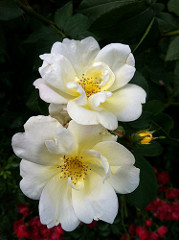

In [45]:
roses = list(data_dir.glob('roses/*'))

PIL.Image.open(str(roses[0]))  # Open the first image in the list

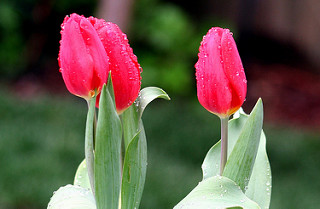

In [46]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))  # Open the first image in the list

In [51]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'daisy': list(data_dir.glob('daisy/*'))
}

In [52]:
flowers_labels_dict = {
    'roses': 0,
    'dandelion': 1,
    'sunflowers': 2,
    'tulips': 3,
    'daisy': 4
}

In [54]:
flowers_images_dict["roses"][0]

WindowsPath('D:/Deep-Learning/Data_Augmentation_CNN/dataset/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [ ]:
img = cv2.imread(str(flowers_images_dict["roses"][0]))
img

In [59]:
img = cv2.resize(img,(180,180))

In [60]:
x = []
y = []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img,(180,180))
        x.append(img)
        y.append(flowers_labels_dict[flower_name])

In [61]:
x = np.array(x)
y = np.array(y)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2936, 180, 180, 3), (2936,), (734, 180, 180, 3), (734,))

In [66]:
x_trained_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [69]:
x_trained_scaled[0].shape

(180, 180, 3)

In [70]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_trained_scaled, y_train, epochs=10, validation_data=(x_test_scaled, y_test))


d:\Deep-Learning\myEnv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 447ms/step - accuracy: 0.3613 - loss: 1.4759 - val_accuracy: 0.5204 - val_loss: 1.0850
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 460ms/step - accuracy: 0.6031 - loss: 0.9934 - val_accuracy: 0.6281 - val_loss: 0.9658
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 451ms/step - accuracy: 0.6790 - loss: 0.8509 - val_accuracy: 0.5913 - val_loss: 0.9908
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 663ms/step - accuracy: 0.7609 - loss: 0.6628 - val_accuracy: 0.6335 - val_loss: 0.9686
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 455ms/step - accuracy: 0.8212 - loss: 0.4883 - val_accuracy: 0.6649 - val_loss: 0.8993
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 426ms/step - accuracy: 0.8980 - loss: 0.2973 - val_accuracy: 0.6839 - val_loss: 0.9775
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 424ms/step - accuracy: 0.9546 - loss: 0.1699 - val_accuracy: 0.6444 - val_loss: 1.2245
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 39s 429ms/step - accuracy: 0.9763 - loss: 0.0872 - val_accu

In [71]:
model.evaluate(x_test_scaled, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.6645 - loss: 1.8045


[1.7612396478652954, 0.6553133726119995]

# Kears.Sequential-->Augmentation

In [95]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal",
                               input_shape=(180, 180, 3)),
])

d:\Deep-Learning\myEnv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
num_classes = 5

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),  # Add dropout layer
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_trained_scaled, y_train, epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 577ms/step - accuracy: 0.2952 - loss: 1.7412
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 52s 565ms/step - accuracy: 0.5293 - loss: 1.1187
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 580ms/step - accuracy: 0.5884 - loss: 1.0276
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 547ms/step - accuracy: 0.6385 - loss: 0.9500
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 533ms/step - accuracy: 0.6543 - loss: 0.8809
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 542ms/step - accuracy: 0.6693 - loss: 0.8417
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 545ms/step - accuracy: 0.6620 - loss: 0.8461
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 541ms/step - accuracy: 0.6904 - loss: 0.8246
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 536ms/step - accuracy: 0.7163 - loss: 0.7447
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 538ms/step - accuracy: 0.7036 - loss: 0.7421


In [97]:
model.evaluate(x_test_scaled, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.7197 - loss: 0.7556


[0.7472965717315674, 0.7111716866493225]

In [99]:
model.predict(x_test_scaled[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


array([[ 1.7188258 ,  5.107632  , -3.4843235 , -0.02439073,  1.5154855 ],
       [ 0.32246315,  1.4533514 , -1.0470397 ,  0.15653457, -0.2616709 ],
       [-2.0176823 ,  3.080682  ,  5.237637  ,  1.9838742 , -2.6152315 ],
       [-1.4671521 ,  4.3460417 ,  5.4840436 ,  2.7393506 , -3.8694248 ],
       [ 6.851957  , -2.8830135 , -3.417093  ,  7.473977  , -2.1155593 ]],
      dtype=float32)